In [208]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [209]:
df = pd.read_csv("C:/Users/DELL/Desktop/robotics/Breast_Cancer_ML/Notebook/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [210]:
def data_analysis(data):
    
    # The shape of the data
    print("The shape of the data set:")
    print(f"The data set consists of {data.shape[0]} rows and {data.shape[1]} columns.")
    
    print('\n***********************************************')
    # Missing Values Check
    print("The existence of missing values in each column:")
    print(data.isnull().any())
    
    print('\n***********************************************')
    # Info of the data
    print("General information about the data:")
    print(data.info())
    
    print('\n***********************************************')
    # Number of unique values in each column
    print("The number of unique values in each column:")
    print(data.nunique())

In [211]:
data_analysis(df)

The shape of the data set:
The data set consists of 569 rows and 33 columns.

***********************************************
The existence of missing values in each column:
id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
a

# Preprocessing of the data:

## `Missing values`

In [212]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## `Drop unrelevant data`

In [213]:
df = df.drop(["id", 'Unnamed: 32'], axis=1)


In [214]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## `Encoding Categorical data`

In [215]:
# Create the encoder variable
encoder = LabelEncoder()

df["diagnosis"] = encoder.fit_transform(df["diagnosis"])
encoded_data = df.copy()

In [216]:
encoded_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## `Upsampling the data`

In [217]:
# Splitting the data accodring to the target
malignant_data = df[encoded_data['diagnosis'] == 1]
benign_data = df[encoded_data['diagnosis'] == 0]

print("Malignant instances:",len(malignant_data))
print("Benign instances:",len(benign_data))

Malignant instances: 212
Benign instances: 357


In [218]:
# Upsampling the malignant data
malignant_upsample = resample(malignant_data,
             replace=True,
             n_samples=len(benign_data),
             random_state=42)

In [219]:
# Merging the data again
upsampled_data = pd.concat([malignant_upsample, benign_data])

In [220]:
# Shuffle the Data
upsampled_data = upsampled_data.sample(frac = 1)

In [221]:
upsampled_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
361,0,13.300,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,0.1815,...,14.200,29.20,92.94,621.2,0.1140,0.16670,0.12120,0.05614,0.2637,0.06658
163,0,12.340,22.22,79.85,464.5,0.10120,0.10150,0.053700,0.028220,0.1551,...,13.580,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082
86,1,14.480,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.049380,0.2075,...,16.210,29.25,108.40,808.9,0.1306,0.19760,0.33490,0.12250,0.3020,0.06846
265,1,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,0.1769,...,32.490,47.16,214.00,3432.0,0.1401,0.26440,0.34420,0.16590,0.2868,0.08218
244,1,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,...,21.650,30.53,144.90,1417.0,0.1463,0.29680,0.34580,0.15640,0.2920,0.07614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.187800,0.1800,...,33.120,32.85,220.80,3216.0,0.1472,0.40340,0.53400,0.26880,0.2856,0.08082
127,1,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.092710,0.056270,0.1946,...,22.320,25.73,148.20,1538.0,0.1021,0.22640,0.32070,0.12180,0.2841,0.06541
507,0,11.060,17.12,71.25,366.5,0.11940,0.10710,0.040630,0.042680,0.1954,...,11.690,20.74,76.08,411.1,0.1662,0.20310,0.12560,0.09514,0.2780,0.11680
97,0,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,...,10.920,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988


## `Splitting the data`

In [222]:
X = upsampled_data.drop("diagnosis", axis =1)
y = upsampled_data["diagnosis"]

In [223]:
scaler = MinMaxScaler()

# Fit and transform the data
scaled_X = scaler.fit_transform(X)

# Create a new DataFrame with the scaled data
scaled_X = pd.DataFrame(scaled_X , columns=X.columns)

## Feature Selection:

## `Initial Feature Selection`

In [224]:
for column in upsampled_data.columns:
    correlations = upsampled_data.corr()[column]
    print(f"Correlation of {column} with other features:")
    print(correlations)
    print("\n")

Correlation of diagnosis with other features:
diagnosis                  1.000000
radius_mean                0.711332
texture_mean               0.445928
perimeter_mean             0.722564
area_mean                  0.665391
smoothness_mean            0.358054
compactness_mean           0.597129
concavity_mean             0.678332
concave points_mean        0.748299
symmetry_mean              0.326801
fractal_dimension_mean    -0.038629
radius_se                  0.536325
texture_se                 0.000640
perimeter_se               0.529053
area_se                    0.479506
smoothness_se             -0.028603
compactness_se             0.311942
concavity_se               0.278435
concave points_se          0.446916
symmetry_se               -0.013157
fractal_dimension_se       0.082809
radius_worst               0.743101
texture_worst              0.468530
perimeter_worst            0.750097
area_worst                 0.672727
smoothness_worst           0.428471
compactness_worst 

###### Pairs of features with 0.8 or higher correlation:

In [225]:
correlation_threshold = 0.8

# Calculate the correlation matrix
correlation_matrix = scaled_X.corr()

# Find pairs of features with 0.8 or higher correlation
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Display the pairs of features with 0.8 or higher correlation
print("Pairs of features with 0.8 or higher correlation:")
for pair in highly_correlated_pairs:
    print(pair)

Pairs of features with 0.8 or higher correlation:
('radius_mean', 'perimeter_mean')
('radius_mean', 'area_mean')
('radius_mean', 'concave points_mean')
('radius_mean', 'radius_worst')
('radius_mean', 'perimeter_worst')
('radius_mean', 'area_worst')
('texture_mean', 'texture_worst')
('perimeter_mean', 'area_mean')
('perimeter_mean', 'concave points_mean')
('perimeter_mean', 'radius_worst')
('perimeter_mean', 'perimeter_worst')
('perimeter_mean', 'area_worst')
('area_mean', 'concave points_mean')
('area_mean', 'area_se')
('area_mean', 'radius_worst')
('area_mean', 'perimeter_worst')
('area_mean', 'area_worst')
('compactness_mean', 'concavity_mean')
('compactness_mean', 'concave points_mean')
('compactness_mean', 'compactness_worst')
('compactness_mean', 'concavity_worst')
('compactness_mean', 'concave points_worst')
('concavity_mean', 'concave points_mean')
('concavity_mean', 'concavity_worst')
('concavity_mean', 'concave points_worst')
('concave points_mean', 'radius_worst')
('concave p

In [226]:
features_mean=list(upsampled_data.columns)
# split dataframe into two based on diagnosis
dfM=upsampled_data[upsampled_data['diagnosis'] ==1]
dfB=upsampled_data[upsampled_data['diagnosis'] ==0]

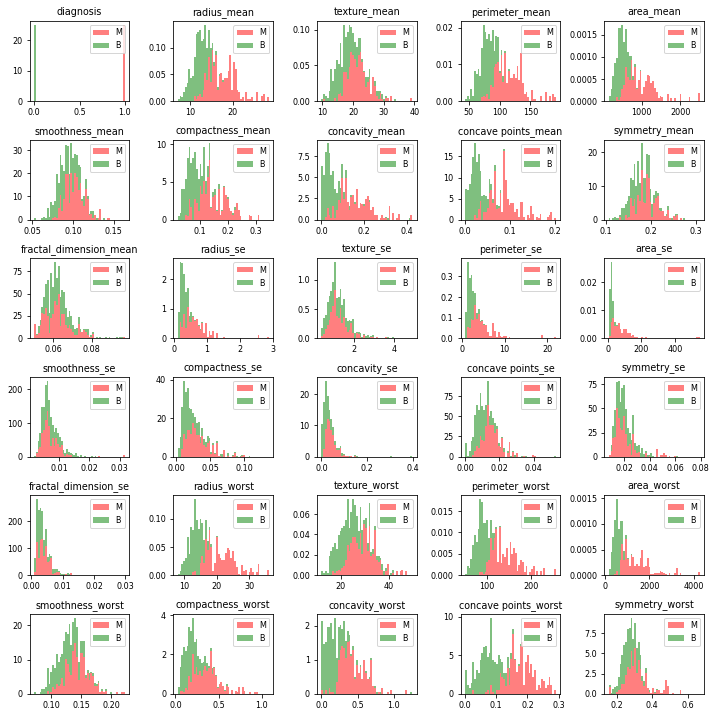

In [227]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]], dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth), alpha=0.5, stacked=True, density=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

### Features observation:
- mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer as seen in the graphs. Larger values of these parameters tends to show a correlation with malignant tumors.
- Also after observing the correlation between features and we got the highest correlated pairs , we started choosing our features by removing some others to avoid multicollinearity, ensuring a balanced representation of information.

- for example: there is a high correltion bewteen radius mean and each of the following features: perimeter_mean,concave points_mean,radius_worst,perimeter_worst and area_worst  and to avoid multicollinearity, we choose only radius mean as so on for the rest of the features.


In [228]:
# Split the data into training and testing sets

selected_features=scaled_X[['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                    'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 
                    'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']]

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.986013986013986


In [229]:
columns_to_drop = [
    'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
    'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

All_features = scaled_X.drop(columns=columns_to_drop)


X_train, X_test, y_train, y_test = train_test_split(All_features, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.958041958041958


### To make sure of our best 16 features we tried training with them and the accuracy was 1.0 and this overfitting can be reduced buy choosing the best 8 from 16 features,on the other hand when we tried the other 14 features the accuracy decreased to 97% and by choosing 8 features from the wrong ones  the accuracy will be much lower.

In [230]:
# Specify the features to keep
features_to_keep = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                    'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 
                    'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Identify features to remove based on highly correlated pairs
features_to_remove = set()

for pair in highly_correlated_pairs:
    feature1, feature2 = pair

    # Check if either feature in the pair needs to be removed
    if feature1 not in features_to_keep:
        features_to_remove.add(feature1)
    if feature2 not in features_to_keep:
        features_to_remove.add(feature2)

# Remove the identified features
scaled_X = scaled_X.drop(columns=features_to_remove)

# Display the remaining features
print("Remaining features:")
print(upsampled_data_filtered.columns)


Remaining features:
Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


## `Recursive Feature Elimination`

In [231]:
scaled_X = scaled_X[["texture_mean", "area_mean", "smoothness_mean", "concavity_mean", "symmetry_mean", "fractal_dimension_mean", 
"texture_se", "area_se", "smoothness_se", "concavity_se", "symmetry_se", "fractal_dimension_se", "smoothness_worst", 
"compactness_worst", "symmetry_worst", "fractal_dimension_worst"]]

In [232]:
# Initialize the Extra Trees classifier
extra_trees_classifier = ExtraTreesClassifier()

# Initialize RFE with the Extra Trees classifier and the desired number of features to keep (8 in this case)
rfe = RFE(extra_trees_classifier, n_features_to_select=8)

# Fit RFE to the data
rfe.fit(scaled_X, y)

# Get the selected features
selected_features = scaled_X.columns[rfe.support_]

# Display the selected features
print("Selected features using Recursive Feature Elimination:")
print(selected_features)

Selected features using Recursive Feature Elimination:
Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_se', 'smoothness_worst', 'compactness_worst',
       'symmetry_worst'],
      dtype='object')


## `Logistic regression `

In [238]:
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(C=0.0001)

# Select the number of features needed
select_from_model = SelectFromModel(logistic_regression_model, max_features=8)

# Fit SelectFromModel to the data
select_from_model.fit(scaled_X, y)

# Get the selected features
selected_features = scaled_X.columns[select_from_model.get_support()]
# Get the corresponding column names

# Display the selected features
print("Selected features using Logistic Regression model:")
print(selected_features)

Selected features using Logistic Regression model:
Index(['texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean',
       'area_se', 'smoothness_worst', 'compactness_worst'],
      dtype='object')


In [245]:
scaled_X[['texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean', 'area_se','smoothness_worst','compactness_worst', 'symmetry_worst']]

,texture_mean,area_mean,concavity_mean,symmetry_mean,area_se,smoothness_worst,compactness_worst,symmetry_worst
0,0.401082,0.170774,0.078351,0.448604,0.026481,0.282837,0.153095,0.211315
1,0.423064,0.136161,0.125820,0.291741,0.027546,0.488873,0.226782,0.138577
2,0.397362,0.214083,0.282099,0.603090,0.059896,0.392459,0.187028,0.286813
3,0.724045,0.541039,0.320291,0.421272,0.360289,0.455194,0.260386,0.256850
4,0.466351,0.429056,0.480084,0.545455,0.100127,0.496137,0.295966,0.267100
...,...,...,...,...,...,...,...,...
709,0.411228,0.893531,0.672680,0.439691,0.227677,0.502080,0.413031,0.254485
710,0.311126,0.421845,0.217221,0.526441,0.139014,0.204253,0.218656,0.251528
711,0.250592,0.094592,0.095197,0.531194,0.010269,0.627551,0.193068,0.239503
712,0.345959,0.064051,0.016000,0.172311,0.024744,0.399062,0.074060,0.072738


## `Univariate Selection`

In [240]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# find best scored 8 features
k_best = SelectKBest(score_func=f_classif, k=8)
X_selected = k_best.fit_transform(scaled_X, y)

# select the best 8 features

univariate_features = scaled_X.columns[k_best.get_support()]

# Display the selected features
print(univariate_features)


Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'area_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst'],
      dtype='object')


In [241]:
selected_univariate_features = scaled_X[univariate_features]
selected_univariate_features

,texture_mean,area_mean,smoothness_mean,concavity_mean,area_se,smoothness_worst,compactness_worst,symmetry_worst
0,0.401082,0.170774,0.299630,0.078351,0.026481,0.282837,0.153095,0.211315
1,0.423064,0.136161,0.438476,0.125820,0.027546,0.488873,0.226782,0.138577
2,0.397362,0.214083,0.377449,0.282099,0.059896,0.392459,0.187028,0.286813
3,0.724045,0.541039,0.379706,0.320291,0.360289,0.455194,0.260386,0.256850
4,0.466351,0.429056,0.452018,0.480084,0.100127,0.496137,0.295966,0.267100
...,...,...,...,...,...,...,...,...
709,0.411228,0.893531,0.512503,0.672680,0.227677,0.502080,0.413031,0.254485
710,0.311126,0.421845,0.266679,0.217221,0.139014,0.204253,0.218656,0.251528
711,0.250592,0.094592,0.602781,0.095197,0.010269,0.627551,0.193068,0.239503
712,0.345959,0.064051,0.449309,0.016000,0.024744,0.399062,0.074060,0.072738


### Final features selected for modeling :texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean','area_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst'